<a href="https://colab.research.google.com/github/Gayatribhosale2610/Credit-Card-Fraud-Detection/blob/main/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# loading the dataset to a Pandas DataFrame
creditcard_data = pd.read_csv('/content/creditcard.csv')

In [ ]:
# first 5 rows of the dataset
creditcard_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
creditcard_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
120896,75998,1.501845,-1.193147,0.066789,-1.600847,-1.259865,-0.268558,-1.122205,0.040104,-1.795060,...,-0.226430,-0.409194,-0.074263,-0.565449,0.404350,-0.168445,0.010981,0.001626,30.00,0.0
120897,75999,-0.340455,1.201756,1.314094,0.053134,0.111616,-0.959891,0.780107,-0.128473,-0.541652,...,-0.252458,-0.609959,-0.025552,0.360654,-0.127871,0.068601,0.251848,0.100380,3.67,0.0
120898,75999,-1.089161,0.115364,1.501978,0.700866,0.493027,-0.220268,0.744468,0.128396,-0.983044,...,0.391619,0.776285,0.179390,0.218712,-0.009381,-0.353213,0.082478,0.143270,130.80,0.0
120899,76000,0.213729,0.623136,-0.259558,-0.152127,2.262088,3.579712,-0.187220,0.877580,-0.697998,...,-0.193588,-0.663299,0.088675,1.005326,-0.676412,0.251661,0.105658,0.088634,1.29,0.0
120900,76001,-0.367988,1.108999,0.787889,1.043825,-0.336914,-0.554318,0.307948,0.402319,-0.651386,...,0.226379,0.551456,0.058382,0.394346,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
creditcard_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120901 entries, 0 to 120900
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    120901 non-null  int64  
 1   V1      120901 non-null  float64
 2   V2      120901 non-null  float64
 3   V3      120901 non-null  float64
 4   V4      120901 non-null  float64
 5   V5      120901 non-null  float64
 6   V6      120901 non-null  float64
 7   V7      120901 non-null  float64
 8   V8      120901 non-null  float64
 9   V9      120901 non-null  float64
 10  V10     120901 non-null  float64
 11  V11     120901 non-null  float64
 12  V12     120901 non-null  float64
 13  V13     120901 non-null  float64
 14  V14     120901 non-null  float64
 15  V15     120901 non-null  float64
 16  V16     120901 non-null  float64
 17  V17     120901 non-null  float64
 18  V18     120901 non-null  float64
 19  V19     120901 non-null  float64
 20  V20     120901 non-null  float64
 21  V21     12

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# checking the number of missing values in each column
creditcard_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

**Handle** the missing values

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


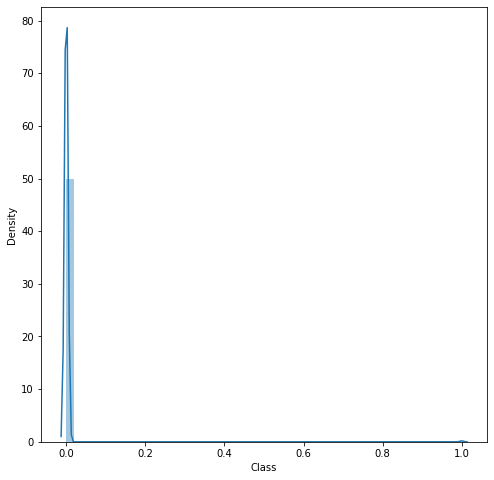

In [ ]:
fig, ax = plt.subplots(figsize = (8,8))
sns.distplot(creditcard_data.Class)

Replace the missing value with Medan value

In [ ]:
creditcard_data['V15'].fillna(creditcard_data['V15'].median(),inplace=True)

In [ ]:
creditcard_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
creditcard_data['Class'].fillna(creditcard_data['Class'].median(),inplace=True)

In [ ]:
creditcard_data.isnull().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     0
dtype: int64

In [ ]:
creditcard_data['Amount'].fillna(creditcard_data['Amount'].median(),inplace=True)

In [ ]:
creditcard_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       1
V26       1
V27       1
V28       1
Amount    0
Class     0
dtype: int64

In [ ]:
creditcard_data['V25'].fillna(creditcard_data['V25'].median(),inplace=True)

In [ ]:
creditcard_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       1
V27       1
V28       1
Amount    0
Class     0
dtype: int64

In [ ]:
creditcard_data['V26'].fillna(creditcard_data['V26'].median(),inplace=True)

In [ ]:
creditcard_data['V27'].fillna(creditcard_data['V27'].median(),inplace=True)

In [ ]:
creditcard_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       1
Amount    0
Class     0
dtype: int64

In [ ]:
creditcard_data['V28'].fillna(creditcard_data['V28'].median(),inplace=True)

In [ ]:
creditcard_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
creditcard_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
120896,75998,1.501845,-1.193147,0.066789,-1.600847,-1.259865,-0.268558,-1.122205,0.040104,-1.795060,...,-0.226430,-0.409194,-0.074263,-0.565449,0.404350,-0.168445,0.010981,0.001626,30.00,0.0
120897,75999,-0.340455,1.201756,1.314094,0.053134,0.111616,-0.959891,0.780107,-0.128473,-0.541652,...,-0.252458,-0.609959,-0.025552,0.360654,-0.127871,0.068601,0.251848,0.100380,3.67,0.0
120898,75999,-1.089161,0.115364,1.501978,0.700866,0.493027,-0.220268,0.744468,0.128396,-0.983044,...,0.391619,0.776285,0.179390,0.218712,-0.009381,-0.353213,0.082478,0.143270,130.80,0.0
120899,76000,0.213729,0.623136,-0.259558,-0.152127,2.262088,3.579712,-0.187220,0.877580,-0.697998,...,-0.193588,-0.663299,0.088675,1.005326,-0.676412,0.251661,0.105658,0.088634,1.29,0.0
120900,76001,-0.367988,1.108999,0.787889,1.043825,-0.336914,-0.554318,0.307948,0.402319,-0.651386,...,0.226379,0.551456,0.058382,0.394346,0.167537,-0.063751,0.010901,0.023449,24.99,0.0


In [ ]:
creditcard_data["Class"].value_counts()

0.0    120652
1.0       249
Name: Class, dtype: int64

This dataset is highly imbalanced

0 --> Normal Transaction

1 --> Fruadulent Transation


In [ ]:
# Separating the datafor analysis
legit = creditcard_data[creditcard_data.Class == 0]
fraud = creditcard_data[creditcard_data.Class == 1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(120652, 31)
(249, 31)


In [ ]:
#statistical measures of the data
legit.Amount.describe()

count    120652.000000
mean         94.185102
std         255.769156
min           0.000000
25%           6.887500
50%          24.990000
75%          84.812500
max       19656.530000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count     249.000000
mean      119.180482
std       251.160611
min         0.000000
25%         1.000000
50%        11.390000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [ ]:
#compare the values for both transactions
creditcard_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,47510.506026,-0.242843,-0.016455,0.695110,0.143974,-0.275557,0.091370,-0.101947,0.057799,-0.073725,...,0.042747,-0.038020,-0.113379,-0.035056,0.011754,0.130599,0.027543,-0.000211,0.001647,94.185102
1.0,40280.433735,-5.846600,4.076891,-7.453278,4.641314,-4.167167,-1.511639,-6.201243,1.559279,-2.696182,...,0.259111,1.324185,-0.314840,-0.103567,-0.108411,0.199329,0.074713,0.522683,0.076517,119.180482


Under- Sampling


Build a sample dataset containing similar distribution of normal transations and fraudulent transactions.

Number of Number of Fraudulent 
tansactions --> 249

In [ ]:
legit_sample = legit.sample(n=249)

Concatenating two datasets

In [ ]:
new_dataset = pd.concat([legit_sample, fraud], axis = 0)

In [ ]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
70478,53883,0.928996,-0.849538,1.638696,1.072137,-1.549529,0.664209,-1.090424,0.430288,1.589377,...,-0.025298,0.186105,-0.129626,0.407503,0.304275,0.548825,0.023265,0.028704,90.00,0.0
42663,41191,1.145527,1.179354,-1.516553,1.533669,0.948752,-1.161533,0.576587,-0.093848,-0.669632,...,-0.121390,-0.270820,-0.162529,-0.110617,0.714935,-0.293483,0.050388,0.084804,1.79,0.0
85291,60704,-0.155929,0.462142,0.318890,-0.814027,2.793674,3.611280,0.611669,0.120199,-0.157114,...,-0.153401,-0.118354,-0.241053,1.040371,-0.404255,0.368581,-0.644020,-0.528816,19.99,0.0
17819,28941,1.180119,0.194139,0.141373,0.948226,-0.120339,-0.456425,0.102731,-0.040598,-0.176336,...,0.065076,0.122068,-0.166484,-0.003292,0.675566,-0.325854,0.001665,0.009663,27.34,0.0
21107,31471,-1.037324,0.963357,0.803547,0.720861,0.736920,-0.084635,0.313869,-1.988822,-0.160957,...,1.491512,-0.171450,-0.297923,-0.450188,-0.187190,-0.298515,0.128034,-0.132311,61.14,0.0


In [ ]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
118308,75033,-0.430330,0.985633,0.645789,0.317131,0.616332,-1.347462,1.078234,-0.161518,-0.492856,...,-0.016378,-0.207609,-0.164119,0.255280,0.454798,-0.505032,-0.039456,-0.006358,30.14,1.0
119714,75556,-0.734303,0.435519,-0.530866,-0.471120,0.643214,0.713832,-1.234572,-2.551412,-2.057724,...,-1.004877,1.150354,-0.152555,-1.386745,0.004716,0.219146,-0.058257,0.158048,29.95,1.0
119781,75581,-2.866364,2.346949,-4.053307,3.983359,-3.463186,-1.280953,-4.474764,1.216655,-2.309829,...,1.049732,0.475840,0.404480,0.282030,-0.506901,-0.371741,0.615257,0.803163,124.53,1.0
120505,75851,-4.793667,3.418911,-5.074445,4.035987,-3.527875,-1.923242,-5.065981,1.996885,-3.097379,...,1.168618,0.289531,-0.371888,0.144761,0.084735,-0.197431,0.328672,0.835395,99.85,1.0
120837,75978,-5.140723,3.568751,-5.896245,4.164720,-4.091193,-1.989960,-5.472436,2.422821,-2.909735,...,1.131130,0.118022,-0.332704,0.139941,0.324758,-0.180769,0.177810,0.661555,99.90,1.0


In [ ]:
new_dataset['Class'].value_counts()

0.0    249
1.0    249
Name: Class, dtype: int64

In [ ]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,47452.361446,-0.134657,0.031891,0.790965,0.106613,-0.227854,0.097494,-0.146850,0.032564,-0.020933,...,0.037748,-0.014627,-0.144931,-0.064640,0.086311,0.126753,-0.020607,-0.013756,-0.013523,76.255984
1.0,40280.433735,-5.846600,4.076891,-7.453278,4.641314,-4.167167,-1.511639,-6.201243,1.559279,-2.696182,...,0.259111,1.324185,-0.314840,-0.103567,-0.108411,0.199329,0.074713,0.522683,0.076517,119.180482


spltting the data into features and targets


In [ ]:
X = new_dataset.drop(columns = 'Class', axis=1)
Y = new_dataset['Class']

In [ ]:
print('X')

X


In [ ]:
print(X)

         Time        V1        V2        V3        V4        V5        V6  \
70478   53883  0.928996 -0.849538  1.638696  1.072137 -1.549529  0.664209   
42663   41191  1.145527  1.179354 -1.516553  1.533669  0.948752 -1.161533   
85291   60704 -0.155929  0.462142  0.318890 -0.814027  2.793674  3.611280   
17819   28941  1.180119  0.194139  0.141373  0.948226 -0.120339 -0.456425   
21107   31471 -1.037324  0.963357  0.803547  0.720861  0.736920 -0.084635   
...       ...       ...       ...       ...       ...       ...       ...   
118308  75033 -0.430330  0.985633  0.645789  0.317131  0.616332 -1.347462   
119714  75556 -0.734303  0.435519 -0.530866 -0.471120  0.643214  0.713832   
119781  75581 -2.866364  2.346949 -4.053307  3.983359 -3.463186 -1.280953   
120505  75851 -4.793667  3.418911 -5.074445  4.035987 -3.527875 -1.923242   
120837  75978 -5.140723  3.568751 -5.896245  4.164720 -4.091193 -1.989960   

              V7        V8        V9  ...       V20       V21       V22  \


In [ ]:
print(Y)

70478     0.0
42663     0.0
85291     0.0
17819     0.0
21107     0.0
         ... 
118308    1.0
119714    1.0
119781    1.0
120505    1.0
120837    1.0
Name: Class, Length: 498, dtype: float64


Split the data into Training data and Testing Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify = Y, random_state = 2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(498, 30) (398, 30) (100, 30)


Model Training

Logistic Regression Model

In [ ]:
model = LogisticRegression()

In [ ]:
# training the logistic Regression Model with Training Data
model.fit(X_train, Y_train)

LogisticRegression()

Model Evaluation

Accuracy Score

In [ ]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print("Accuracy on training data: ", training_data_accuracy)

Accuracy on training data:  0.9371859296482412


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print("Accuracy score on test data: ", test_data_accuracy)

Accuracy score on test data:  0.91
